In [1]:
import numpy as np
import matplotlib.pyplot as plt


<ErrorbarContainer object of 3 artists>

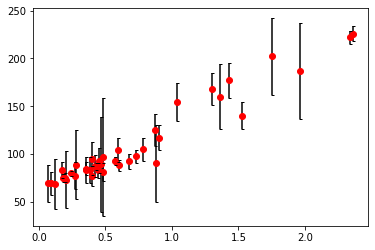

In [4]:
Hz = np.array([69.0 ,69.0,68.6,83.0,75.0,75.0 ,72.9,79.69,77.0,88.8,84.4,83.0,83.0,95.0,77.0,87.1,86.45,82.6,92.8,89,80.9 ,97.0,92.4,104.0,87.9,92.0,97.3,105.0,125.0,90.0,117.0,154.0,168.0,160.0,177.0,140.0,202.0,186.5,222.0,226.0])
Hz_error = np.array([19.68, 12.0, 26.2,8.0,4.0,5.0,29.6, 2.65,14.0,36.6,7.0,14.0,13.5,17.0,10.2, 11.2, 3.68,7.8,12.9,50,9,62.0,4.5,13.0,6.1,8.0,7.0,12.0,17.0,40.0,13.0,20.0,17.0,33.6,18.0,14.0,40.0,50.4,7.0,8.0])
z = np.array([0.0708,0.09,0.12,0.17,0.179,0.199,0.2,0.240,0.27,0.28,0.35,0.352,0.3802,0.4,0.4004,0.4247,0.43,0.44,0.4497,0.47,0.4783,0.48,0.57,0.593,0.6,0.68,0.73,0.781,0.875,0.88,0.9,1.037,1.3,1.363,1.43,1.53,1.75,1.965,2.34,2.36])
plt.figure(facecolor='white')
plt.plot(z,Hz,'o',c='r')
plt.errorbar(z,Hz,Hz_error,fmt='o', ecolor='black', markersize='0.01', capsize= 1.5)

In [35]:
def model(theta):
    H0= theta
    om=0.1
    odm=0.9
    model = (((1+z)**3)*om + odm)**0.5
    if model<=0 :
        return 1e8
    return H0*(model)


In [36]:
theta=10
model(theta)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
def lnlike(theta, z,Hz,Hz_error):
    H=model(theta)
    chi_square = (-0.5*(((Hz-H))/(Hz_error))**2).sum()
    return(chi_square)

In [16]:
def lnprior(theta):
    H0,om,odm = theta
    if 60 < H0 < 80 and 0 <om<0.3 and 0.6 < odm < 0.9 :
        return 0.0
    return -np.inf

In [17]:
def lnprob(theta, z, Hz, Hz_error):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, z, Hz, Hz_error)


NameError: name 'theta' is not defined

In [29]:
md=model(theta)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [10]:
data = (z, Hz,Hz_error)
nwalkers=250
niter=300
initial = np.array([1.0, 1.0, 1.0, 26000., 41000.,100000.,-4.5])
ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]


In [11]:
def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

In [12]:
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)


NameError: name 'lnprob' is not defined